In [2]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from scipy import stats
from scipy.optimize import minimize,curve_fit
from scipy.stats import gaussian_kde as kde
np.random.seed(9620)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

import seaborn as sns
sns.set(style='ticks', context='talk')
plt.style.use("../paper.mplstyle")

from multiprocessing import Pool
from tqdm import tqdm

from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import SkyCoord, Galactic
from astropy import units as u

from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
def plot_results(results,x_th,slope,color='yellowgreen',plot_early=True,plot_late=False,ax=None,label=None,
                plot_axvline=True,plot_axvspan=False,plot_errorbar=True,yscale=1,ls=':',errorbar_yloc=0.3):
    # data prep
    HR = x_th*slope
    offset = results[1][1][2]
    mean_min = results[2][0][2] - results[2][1][2]
    mean_mpb = results[1][0][2] - results[1][1][2]
    mean_max = results[0][0][2] - results[0][1][2]
    early_dist_b = results[1][0][1]
    late_dist_b = results[1][1][1]
    
    if ax==None:
        ax = plt.gca()
    if plot_early:
        p, = ax.plot(HR-offset,early_dist_b*yscale,c=color,lw=5,alpha=0.8,label=label,linestyle=ls)
    if plot_late:
        ax.plot(HR-offset,late_dist_b*yscale,c='lightblue',lw=3,alpha=0.8,label=label)

    if plot_axvline:
        ax.axvline(mean_mpb,linestyle=ls,color=color,alpha=0.8,lw=2.5,zorder=5)
    if plot_axvspan:
        ax.axvspan(mean_min,mean_max,color=color,alpha=0.05)
    if plot_errorbar:
        err_min = mean_min-mean_mpb
        err_max = mean_mpb-mean_max
        ax.errorbar(mean_mpb,errorbar_yloc,xerr=[[err_min],[err_max]], fmt='o', 
                    color=color, ecolor=color, ms=11, lw=5,capsize=9, zorder=10,alpha=1)
    return p

In [4]:
with open('data/K20.npy', 'rb') as f:
    K20_firefly = np.load(f,allow_pickle=True)
    K20_pipe3d = np.load(f,allow_pickle=True)
    K20_Starlight = np.load(f,allow_pickle=True)
    K20_SN_early = np.load(f,allow_pickle=True)
    K20_SN_late = np.load(f,allow_pickle=True)

In [5]:
with open('data/U20.npy', 'rb') as f:
    U20_granada = np.load(f,allow_pickle=True)
    U20_portsmouth = np.load(f,allow_pickle=True)
    U20_firefly = np.load(f,allow_pickle=True)
    U20_pipe3d = np.load(f,allow_pickle=True)
    U20_Starlight = np.load(f,allow_pickle=True)
    U20_SN_early = np.load(f,allow_pickle=True)
    U20_SN_late = np.load(f,allow_pickle=True)

In [6]:
with open('data/R19.npy', 'rb') as f:
    R19_granada = np.load(f,allow_pickle=True)
    R19_portsmouth = np.load(f,allow_pickle=True)
    R19_firefly = np.load(f,allow_pickle=True)
    R19_pipe3d = np.load(f,allow_pickle=True)
    R19_Starlight = np.load(f,allow_pickle=True)
    R19_SN_early = np.load(f,allow_pickle=True)
    R19_SN_late = np.load(f,allow_pickle=True)

In [7]:
x_th = np.linspace(-10,30,1000)
bins = np.linspace(-1,1,80)

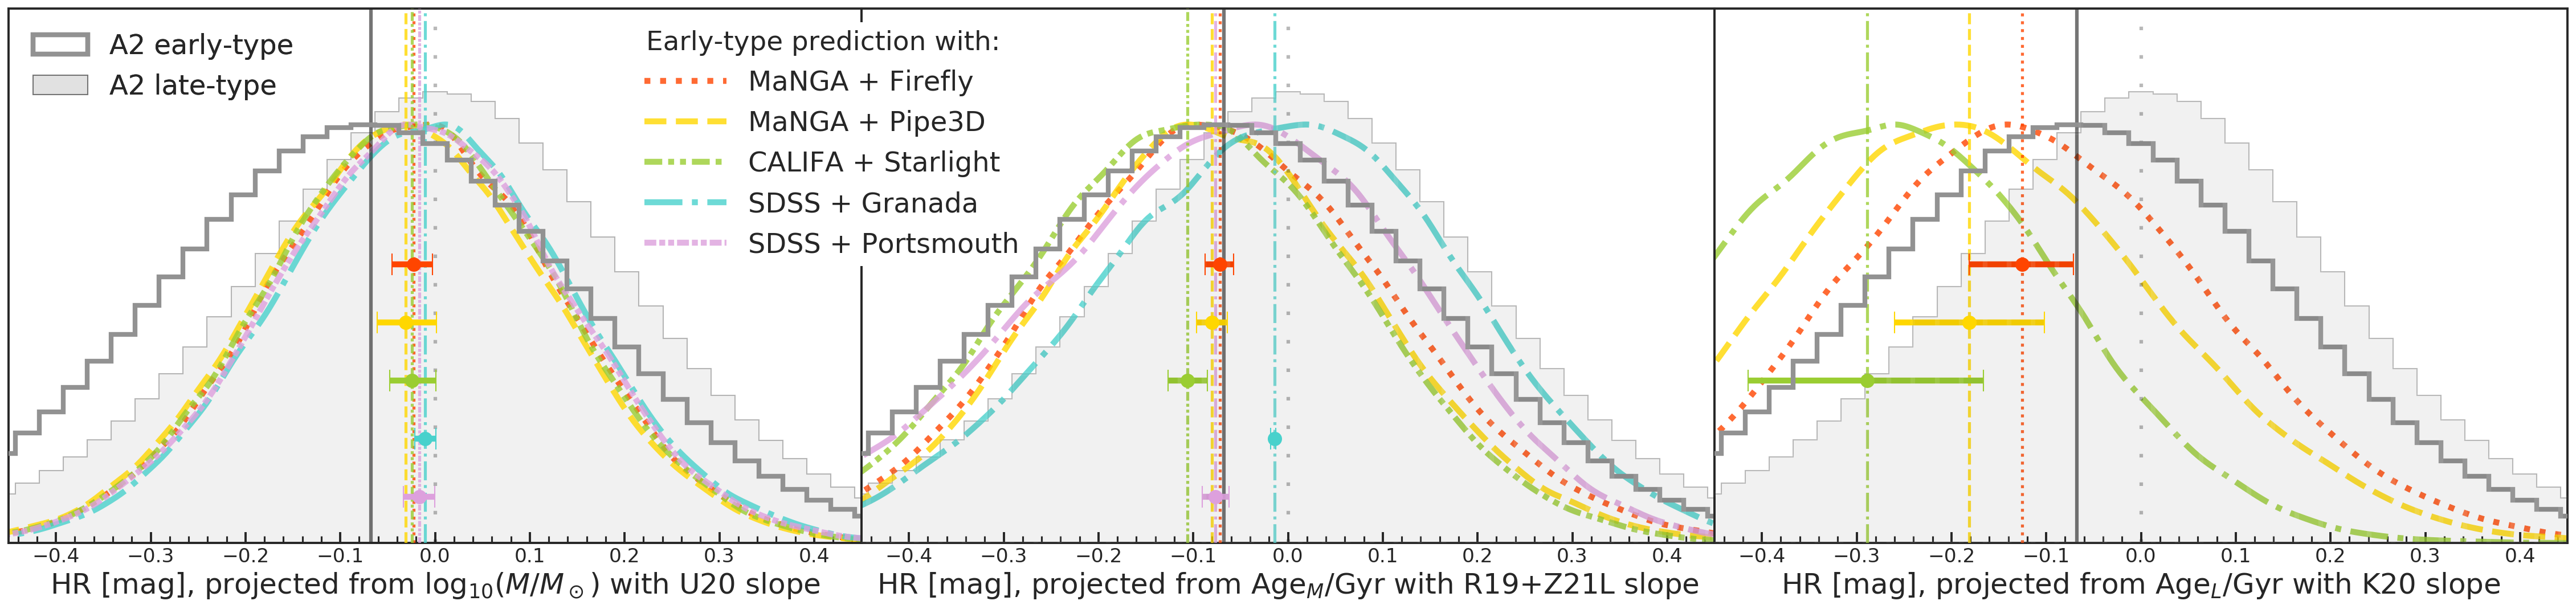

In [18]:
# plot - with the same binning as other tests
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,7),dpi=150)
plt.subplots_adjust(wspace=0,bottom=0.105,top=0.999,left=0.001,right=0.999)

####### LEFT: U20 ######
slope = -0.0263

y1,_,_ = ax1.hist(U20_SN_early-U20_SN_late.mean(),color='#929292',bins=bins,density=True,alpha=1,label='A2 early-type',lw=4,zorder=10,histtype=u'step',)
y2,_,_ = ax1.hist(U20_SN_late-U20_SN_late.mean(),color='k',bins=bins,density=True,alpha=0.06,label='A2 late-type',lw=4,zorder=-1,)#histtype=u'step',)
y2,_,_ = ax1.hist(U20_SN_late-U20_SN_late.mean(),color='k',bins=bins,density=True,alpha=0.3,lw=1,zorder=-1,histtype=u'step',)

rect1 = Rectangle((0,0),1,1,color='none',ec='#929292',alpha=1,lw=4)
rect2 = Rectangle((0,0),1,1,color=(0,0,0,0.06),ec=(0,0,0,0.3),lw=1)
labels = ['A2 early-type','A2 late-type']
leg1 = ax1.legend([rect1,rect2],labels,bbox_to_anchor=(0,1),loc='upper left',ncol=1,fontsize=23)

l1 = plot_results(U20_firefly,x_th,slope,yscale=y1.max(),color='orangered',ls='dotted',errorbar_yloc=1.2,ax=ax1)
l2 = plot_results(U20_pipe3d,x_th,slope,yscale=y1.max(),color='gold',ls='dashed',errorbar_yloc=0.95,ax=ax1)
l3 = plot_results(U20_Starlight,x_th,slope,yscale=y1.max(),color='yellowgreen',ls=(0, (3, 1, 1, 1, 1, 1)),errorbar_yloc=0.7,ax=ax1)
l4 = plot_results(U20_granada,x_th,slope,yscale=y1.max(),color='mediumturquoise',ls='dashdot',errorbar_yloc=0.45,ax=ax1)
l5 = plot_results(U20_portsmouth,x_th,slope,yscale=y1.max(),color='plum',ls=(0,(2,.5,1,.5,1,.5)),errorbar_yloc=0.2,ax=ax1)
leg2 = ax2.legend([l1,l2,l3,l4,l5],
                ['MaNGA + Firefly','MaNGA + Pipe3D','CALIFA + Starlight','SDSS + Granada','SDSS + Portsmouth'],
                bbox_to_anchor=(-0.28,1.),loc='upper left',handlelength=3,
                 title='Early-type prediction with:  ',
                  framealpha=1,
                  facecolor='white',
                  frameon=True,
                  edgecolor='none',
                  borderpad = 0.3,
                 fontsize=23)
leg2.get_title().set_fontsize(22.5)
# leg2.set_zorder(1)
ax1.add_artist(leg1)                 
ax1.axvline(U20_SN_early.mean()-U20_SN_late.mean(),linestyle='-',c='k',lw=3,alpha=0.6)
ax1.axvline(0,linestyle=(0,(1,7)),c='k',lw=3,alpha=0.3)
ax1.set_xlabel(r'HR [mag], projected from $\log_{10}(M/M_\odot)$ '+'with U20 slope',fontsize=24)
ax1.set_xlim(-0.45,0.45)
ax1.set_ylim(0,2.3)
ax1.set_yticks([])


####### MID: R19 + Z21L ######
slope = -0.036

y1,_,_ = ax2.hist(R19_SN_early-R19_SN_late.mean(),color='#929292',bins=bins,density=True,alpha=1,label='A2 early-type',histtype=u'step',lw=4,zorder=10)
y2,_,_ = ax2.hist(R19_SN_late-R19_SN_late.mean(),color='k',bins=bins,density=True,alpha=0.06,label='A2 late-type',lw=4,zorder=10)#,histtype=u'step',)
y2,_,_ = ax2.hist(U20_SN_late-U20_SN_late.mean(),color='k',bins=bins,density=True,alpha=0.3,lw=1,zorder=-1,histtype=u'step',)
plot_results(R19_firefly,x_th,slope,yscale=y1.max(),color='orangered',label='MaNGA + Firefly',ls='dotted',errorbar_yloc=1.2,ax=ax2)
plot_results(R19_pipe3d,x_th,slope,yscale=y1.max(),color='gold',label='MaNGA + Pipe3D',ls='dashed',errorbar_yloc=0.95,ax=ax2)
plot_results(R19_Starlight,x_th,slope,yscale=y1.max(),color='yellowgreen',label='CALIFA + Starlight',ls=(0, (3, 1, 1, 1, 1, 1)),errorbar_yloc=0.7,ax=ax2)
plot_results(R19_granada,x_th,slope,yscale=y1.max(),color='mediumturquoise',label='SDSS DR8 + FSPS',ls='dashdot',errorbar_yloc=0.45,ax=ax2)
plot_results(R19_portsmouth,x_th,slope,yscale=y1.max(),color='plum',label='SDSS DR8 + Portsmouth',ls='dashdot',errorbar_yloc=0.2,ax=ax2)
ax2.axvline(R19_SN_early.mean()-R19_SN_late.mean(),linestyle='-',c='k',lw=3,alpha=0.6)
ax2.axvline(0,linestyle=(0,(1,7)),c='k',lw=3,alpha=0.3)
ax2.set_xlabel(r'HR [mag], projected from Age$_M/$Gyr '+'with R19+Z21L slope',fontsize=24)
# ax2.legend(ncol=1)
ax2.set_xlim(-0.45,0.45)
ax2.set_ylim(0,2.3)
ax2.set_yticks([])

####### RIGHT: K20 ######
slope = -0.051

y1,_,_ = ax3.hist(R19_SN_early-R19_SN_late.mean(),color='#929292',bins=bins,density=True,alpha=1,label='A2 early-type',histtype=u'step',lw=4,zorder=10)
y2,_,_ = ax3.hist(R19_SN_late-R19_SN_late.mean(),color='k',bins=bins,density=True,alpha=0.06,label='A2 late-type',lw=4,zorder=10)#,histtype=u'step')
y2,_,_ = ax3.hist(U20_SN_late-U20_SN_late.mean(),color='k',bins=bins,density=True,alpha=0.3,lw=1,zorder=-1,histtype=u'step',)
plot_results(K20_firefly,x_th,slope,yscale=y1.max(),color='orangered',label='MaNGA + Firefly',ls='dotted',errorbar_yloc=1.2,ax=ax3)
plot_results(K20_pipe3d,x_th,slope,yscale=y1.max(),color='gold',label='MaNGA + Pipe3D',ls='dashed',errorbar_yloc=0.95,ax=ax3)
plot_results(K20_Starlight,x_th,slope,yscale=y1.max(),color='yellowgreen',label='CALIFA + Starlight',ls='dashdot',errorbar_yloc=0.7,ax=ax3)
ax3.axvline(R19_SN_early.mean()-R19_SN_late.mean(),linestyle='-',c='k',lw=3,alpha=0.6)
ax3.axvline(0,linestyle=(0,(1,7)),c='k',lw=3,alpha=0.3)
ax3.set_xlabel(r'HR [mag], projected from Age$_L/$Gyr '+'with K20 slope',fontsize=24)
# ax3.legend(ncol=1)
ax3.set_xlim(-0.45,0.45)
ax3.set_ylim(0,2.3)
ax3.set_yticks([])

plt.savefig('fig/rev1_mainplot.pdf',bbox_to_inches='tight')
plt.savefig('fig/rev1_mainplot.png',dpi=150,bbox_to_inches='tight')
plt.show()

In [8]:
abs(K20_SN_early.mean()-K20_SN_late.mean())

0.06774860574547154